<a href="http://www.cear.ufpb.br/pet">
    <img src="../images/logo_pet.png" width="150px" align="right">
</a>

<h1 align="center">
    <font color='blue' >
        Manipulando dados da COVID-19
    </font>
</h1>

<hr width="50%" align="center">

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
dados_covid = pd.read_csv('../datasets/boletim_diario.csv')

In [97]:
dados_covid.head()

,data,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
0,2021-01-22,181773,1309,229721,138676,3955,16,0.0218
1,2021-01-21,180464,1111,229281,138673,3939,13,0.0218
2,2021-01-20,179353,1272,228228,138664,3926,14,0.0219
3,2021-01-19,178081,238,228046,133894,3912,10,0.0220
4,2021-01-18,177843,225,227850,133463,3902,14,0.0219


In [100]:
dados_covid['data'] = pd.to_datetime(dados_covid['data'])

In [109]:
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              313 non-null    datetime64[ns]
 1   casosAcumulados   313 non-null    int64         
 2   casosNovos        313 non-null    int64         
 3   descartados       313 non-null    int64         
 4   recuperados       313 non-null    int64         
 5   obitosAcumulados  313 non-null    int64         
 6   obitosNovos       313 non-null    int64         
 7   Letalidade        313 non-null    float64       
 8   casosNovosMM      307 non-null    float64       
 9   obitosNovosMM     300 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 24.5 KB


In [101]:
dados_covid.tail()

,data,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
308,2020-03-20,0,0,0,0,0,0,0.0
309,2020-03-19,0,0,0,0,0,0,0.0
310,2020-03-18,0,0,0,0,0,0,0.0
311,2020-03-17,0,0,0,0,0,0,0.0
312,2020-03-16,0,0,0,0,0,0,0.0


In [102]:
# Vemos uma série temporal datada de 20/03/2020 a 22/01/2021.

In [103]:
dados_covid.describe()

,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,83940.022364,580.744409,108888.785942,59678.070288,1907.702875,12.635783,0.031785
std,60573.257636,500.482599,82722.447400,50526.573715,1359.833827,8.868064,0.027808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14859.000000,162.000000,13270.000000,2920.000000,379.000000,7.000000,0.022100
50%,98494.000000,523.000000,119323.000000,60655.000000,2223.000000,11.000000,0.023000
75%,134297.000000,838.000000,187718.000000,110029.000000,3138.000000,18.000000,0.023400
max,181773.000000,3333.000000,229721.000000,138676.000000,3955.000000,46.000000,0.145500


In [104]:
dados_covid['casosNovosMM'] = dados_covid.rolling(window=7)['casosNovos'].mean()

In [105]:
dados_covid['obitosNovosMM'] = dados_covid.rolling(window=14)['obitosNovos'].mean()

In [106]:
dados_covid.head(15)

,data,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade,casosNovosMM,obitosNovosMM
0,2021-01-22,181773,1309,229721,138676,3955,16,0.0218,NaN,NaN
1,2021-01-21,180464,1111,229281,138673,3939,13,0.0218,NaN,NaN
2,2021-01-20,179353,1272,228228,138664,3926,14,0.0219,NaN,NaN
3,2021-01-19,178081,238,228046,133894,3912,10,0.0220,NaN,NaN
4,2021-01-18,177843,225,227850,133463,3902,14,0.0219,NaN,NaN
5,2021-01-17,177618,783,227732,133270,3888,8,0.0219,NaN,NaN
6,2021-01-16,176835,838,226683,132838,3880,11,0.0219,825.142857,NaN
7,2021-01-15,175997,770,226001,132352,3869,12,0.0220,748.142857,NaN
8,2021-01-14,175227,1028,225417,132009,3857,12,0.0220,736.285714,NaN
9,2021-01-13,174199,681,224879,131239,3845,9,0.0221,651.857143,NaN


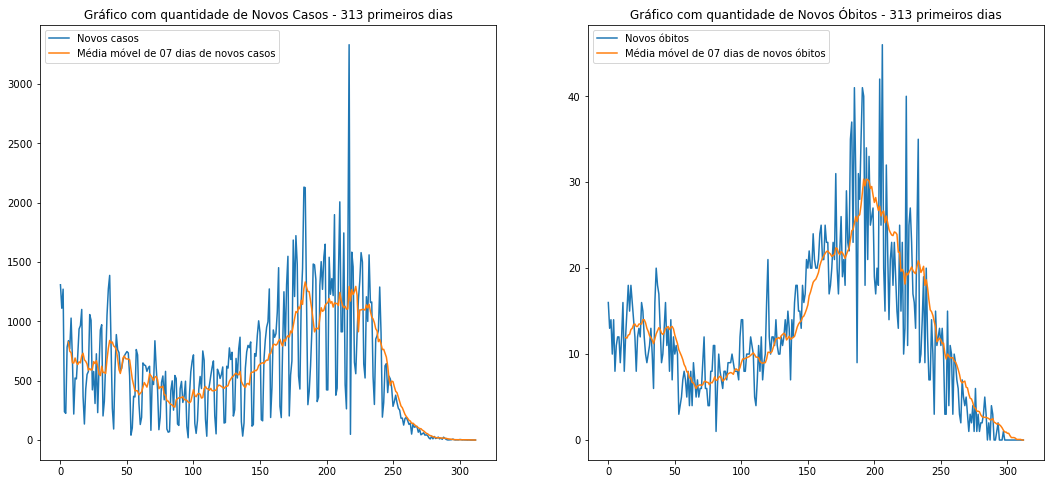

In [148]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8))

ax1 = dados_covid.filter(items=['casosNovos', 'casosNovosMM']).plot(
    ax=ax1,
    title='Gráfico com quantidade de Novos Casos - 313 primeiros dias',
)
ax1.legend(['Novos casos', 'Média móvel de 07 dias de novos casos'])

ax2 = dados_covid.filter(items=['obitosNovos', 'obitosNovosMM']).plot(
    ax=ax2,
    title='Gráfico com quantidade de Novos Óbitos - 313 primeiros dias',
)
ax2.legend(['Novos óbitos', 'Média móvel de 07 dias de novos óbitos'])

In [149]:
df_semana_epidemiologica = dados_covid.resample('W', on='data')

In [150]:
df_semana_epidemiologica = df_semana_epidemiologica.mean()

In [151]:
del df_semana_epidemiologica['obitosNovosMM']
del df_semana_epidemiologica['casosNovosMM']

In [152]:
df_semana_epidemiologica.head()

,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
data,,,,,,,
2020-03-22,0.285714,0.142857,5.714286,0.000000,0.000000,0.000000,0.000000
2020-03-29,7.857143,2.000000,215.000000,0.000000,0.000000,0.000000,0.000000
2020-04-05,26.571429,2.857143,459.142857,0.000000,1.571429,0.571429,0.045129
2020-04-12,72.571429,10.857143,736.285714,16.571429,9.000000,1.285714,0.121486
2020-04-19,190.571429,19.142857,961.571429,77.571429,25.142857,2.714286,0.132100


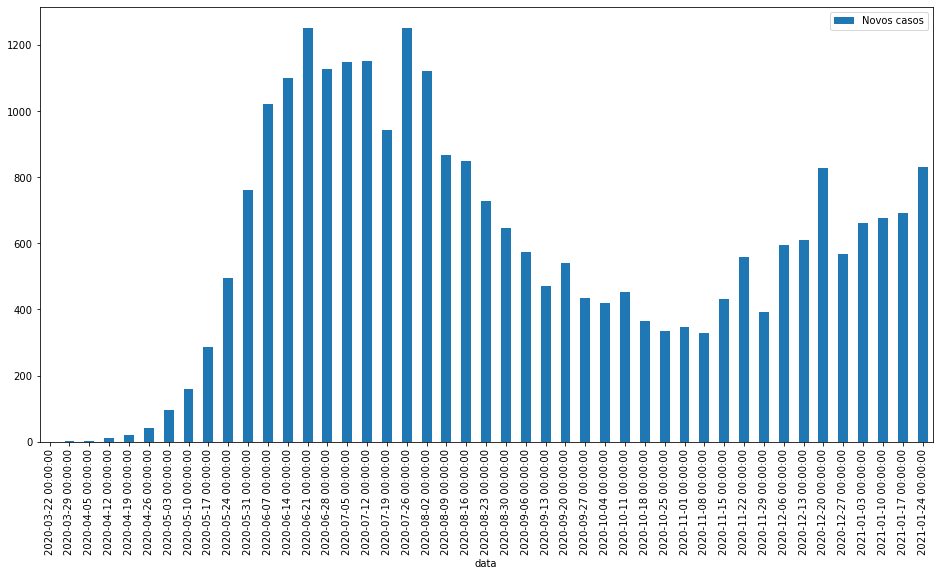

In [153]:
df_semana_epidemiologica [:100].plot.bar(
    y=['casosNovos'],
    figsize=(16,8),
)
plt.legend(["Novos casos"])

<div>
    <a href="https://www.ufpb.br/">
        <img src="../images/logo_ufpb.png" align="left" height="50px" width="70px">
    </a>
    <a href="http://www.cear.ufpb.br/">
        <img src="../images/logo_cear.png" align="left" width="95px">
    </a>
</div>